In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [8]:
def get_all_files(folder):
    file_list = []
    if os.path.exists(folder):
        for root, dirs, files in os.walk(folder):
            for file in files:
                file_list.append(os.path.join(root,file))
    return file_list

def tally(num_players):
    with open("./updates_only.csv", "a") as fout:
        total = 0
        for file in get_all_files("../../output/"):
            with open(file, "r") as comms:
                total += len(comms.readlines())
        fout.write(f"{num_players},{total}\n")

In [17]:
tally(6)

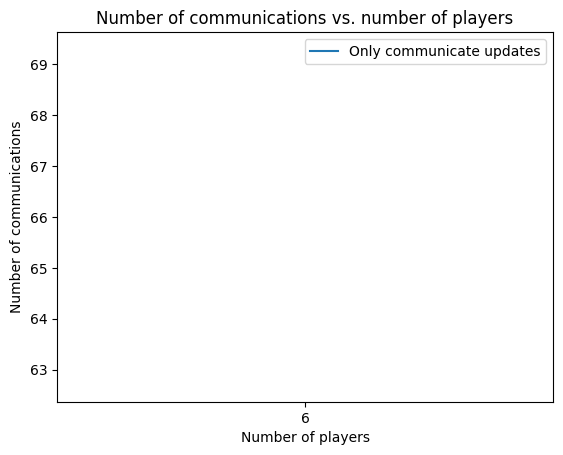

In [10]:
# Plot num_players and comms from "players_to_comms.csv"
df = pd.read_csv("./updates_only.csv")
# Average by num_players
xs = df["num_players"].unique()
df = df.groupby("num_players").mean()
ys = [df.loc[x, "comms"] for x in xs]
plt.plot(xs, ys, label="Only communicate updates")
# Set only integer xticks
plt.xticks(np.arange(min(xs), max(xs)+1, 1.0))
plt.xlabel("Number of players")
plt.ylabel("Number of communications")
plt.title("Number of communications vs. number of players")
plt.legend()
plt.show()


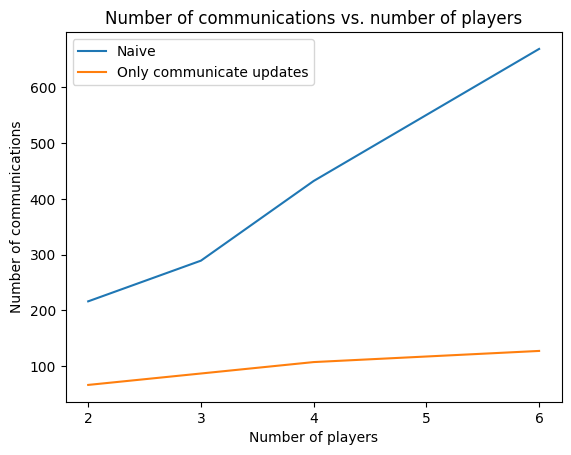

In [18]:
# Plot num_players and comms from "naive.csv" and "updates_only.csv" and compare
df = pd.read_csv("./naive.csv")
# Average by num_players
xs = df["num_players"].unique()
df = df.groupby("num_players").mean()
ys = [df.loc[x, "comms"] for x in xs]
plt.plot(xs, ys, label="Naive")
df = pd.read_csv("./updates_only.csv")
# Average by num_players
xs = df["num_players"].unique()
df = df.groupby("num_players").mean()
ys = [df.loc[x, "comms"] for x in xs]
plt.plot(xs, ys, label="Only communicate updates")
# Set only integer xticks
plt.xticks(np.arange(min(xs), max(xs)+1, 1.0))
plt.xlabel("Number of players")
plt.ylabel("Number of communications")
plt.title("Number of communications vs. number of players")
plt.legend()